# Performance Study of Charcoal-based Radon Reduction Systems for Ultra-clean Rare-event Detectors
 

Maris Arthurs, Dongqing Huang, Chamindu Amarasinghe, and Wolfgang Lorenzon -- University of Michigan

Eric Miller -- SLAC National Accelerator Laboratory

In [139]:
# liabrary import
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib


In [140]:
# local function for figure display
# case_id = 1 for standard display
# case_id = 2 for pdf
# case_id = 3 for adjustable figure display
def figure_layout(case_id = 1, font = 'times new roman', weight = 'regular', size = 18):
   # case_id can only be 1,2,3
    if len([case_id]) > 1:
        print('Error: one case one time')
        return -1
    if (case_id == np.array([1,2,3])).sum() == 0:
        print('Error: Case can only be 1,2,or,3')
        return -1
    if case_id == 1:
        %matplotlib notebook
        %matplotlib inline
    elif case_id == 2:
        %matplotlib inline
        from IPython.display import set_matplotlib_formats
        set_matplotlib_formats('pdf')
    elif case_id == 3:
        %matplotlib notebook
    font = {'family' : font,
            'weight' : weight,
            'size'   : size}
    matplotlib.rc('font', **font)
    

### Radon Reduction with an RRS on the main circulation loop of LZ

Turnaround time of LZ in days: $T_{LZ} = \frac{M_{LZ}}{F \rho_{Xe}}$

In [141]:
#Constants
RoXeAtSTP     = 5.86 # desity of xenon at STP in g/l
totalXeMassLZ = 10000000 # g which is 10 metric tonnes
F             = 500 # SLPM nominal LZ mass flow rate
T_LZ          = totalXeMassLZ/(F*RoXeAtSTP*60*24) #Lz turnaround time in days
TauRN         = 5.516 # radon lifetime in days

print("Turnaround time of LZ is %.1f days" %T_LZ)


Turnaround time of LZ is 2.4 days


radon reduction fraction in LZ with a perfect trap: $\frac{N_{ss}}{N_{max}} =\frac{T_{LZ}}{\epsilon_{RRS}\tau +T_{LZ}}$

In [142]:

Rn_red_fraction_LZ = T_LZ/(TauRN + T_LZ) # fraction of radon reduction

# efficacy is 1 - radon reduction fraction
print("Radon reduction efficacy in LZ with a perfect trap is %.2f" %(1-Rn_red_fraction_LZ)) 

Radon reduction efficacy in LZ with a perfect trap is 0.70


Efficacy of Rn reduction in LZ: $ \epsilon_{LZ}=1-\frac{N_{ss}}{N_{max}}  =\frac{\tau }{\tau +T_{LZ}/\epsilon_{RRS}}$

In [143]:
# Efficacy of radon reduction in LZ
E_RRS = 0.53 # efficiency of the radon reduction system
Ef_LZ = TauRN/(TauRN + T_LZ/E_RRS)
print("Radon reduction efficacy in LZ with a perfect trap is %.2f when RRS efficacy is %.2f" %(Ef_LZ, E_RRS))

Radon reduction efficacy in LZ with a perfect trap is 0.55 when RRS efficacy is 0.53


reduction factor: $\frac{(T_{LZ}/\tau) +1}{T_{LZ}/\tau}$

In [144]:
FlowSpace = np.linspace(1,3000,1000) # range of flow rates from 1 to 3000 SLPM
TvSpace = totalXeMassLZ/(FlowSpace*RoXeAtSTP*60*24) # LZ xenon turnaround time as a fuction of the flow rate
red_efficiency = TauRN/(TauRN + TvSpace) # radon reduciton efficacy (1-RR) as a function of the circulation flow rate with a  perfect RRS
reduction_factor = (TvSpace/TauRN+1)/(TvSpace/TauRN) # Radon reduction factor as a function of the flow rate

In [148]:

figure_layout(1)
plt.figure(figsize=(8,6))
plt.plot(FlowSpace,(red_efficiency))
plt.ylabel('Reduction Efficacy')
plt.xlabel('Flow Rate (SLPM)')

plt.axhline(y=0.7, xmin=0, xmax=0.22, color='r', linestyle='--')
plt.axvline(x=500, ymin=0, ymax=0.75, color='r', linestyle='--')
plt.plot(500, 0.7, 'ro')
#plt.text(430, 0.75, 'LZ', dict(size=15), color='r',)

plt.show()

In [41]:

figure_layout(1)
plt.figure(figsize=(8,6))
plt.plot(FlowSpace,(reduction_factor))
plt.ylabel('Reduction Factor')
plt.xlabel('Flow Rate (SLPM)')

plt.axhline(y=10, xmin=0, xmax=0.65, color='r', linestyle='--')
plt.axvline(x=1940, ymin=0, ymax=0.66, color='r', linestyle='--')
plt.plot(1940, 10, 'ro')

plt.show()



### Exploring performance of a Single-trap

In [42]:
flowSpace = np.linspace(0,2000,300, endpoint=False) # range of flow rates SLPM
red_frac  = 0.1 #trap efficacy is (1- reduciton factor)
Ka_ct     = 3000 #l/kg at 190K
Ka_wt     = 500 #l/kg at 295K
TauRN     = 5.516*24*60 # radon lifetime in min
S_o       = 0.5 #mBq/kg

reduction fraction a perfect trap with no activity: $r =\frac{ A_{out}}{A_{in}} = e^{-\frac{m}{\mu}}$

In [43]:
mass_cold = flowSpace*(-np.log(red_frac))*TauRN/Ka_ct # mass of charcoal needed to achieve Teff efficacy in cold
mass_warm = flowSpace*(-np.log(red_frac))*TauRN/Ka_wt # mass of charcoal needed to achieve Teff efficacy in warm

characteristic mass of a trap: $\mu=f\tau /k_a$

In [44]:
#characteristic mass of a trap
def miu(flow, ka, Tau):
    return (flow*Tau/ka)

In [45]:
miuSpace = miu(flowSpace,Ka_ct,TauRN) # the characterisitc mass of a trap as a function of flow rate

In [46]:
figure_layout(1)
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
ax.plot(flowSpace, mass_cold, '--', label="190 K")
ax.plot(flowSpace, mass_warm, label="295 K")
ax.set_xlabel('Flow Rate (SLPM)')
ax.set_ylabel('Charcoal Mass (kg)')
ax.legend()

def flow2miu(flowSpace):
    return (flowSpace*TauRN/Ka_ct)

def miu2flow(flowSpace):
    return (flowSpace)

plt.axvline(x=500, ymin=0, ymax=0.4, color='r', linestyle='--')
plt.text(450, 30000, 'LZ', dict(size=15), color='r',)

secax = ax.secondary_xaxis('top', functions=(flow2miu, miu2flow))
secax.set_xlabel('Characteristic Mass (kg)')
plt.show()



Efficacy of a single trap: $\epsilon=1-A_{out}/A_{in} = 1- e^{-\frac{m}{\mu}} - \frac{s_o \mu}{A_{in}} \left(1-e^{-\frac{m}{\mu}}\right)$

In [47]:
#this funtion calculates the efficacy of a single-column adsorptive trap
def E_CT(flow, mass, ka, Tau, Srn, N):
    return 1- np.exp(-ka*mass/(flow*Tau)) - Srn*flow*(Tau/ka)*(1 - np.exp(-ka*mass/(flow*Tau)))/N


In [48]:
#constants
flowSpace = np.linspace(0.2,1000,10000)
Ka_ct     = 3000 #l/kg at 190K
Ka_wt     = 500 #l/kg at 295K
TauRN     =  5.516*24*60 # radon lifetime in min
S_o       = 0.5 #mBq/kg
Trap_mass = 10 #mass of the charcoal kg
massSpace = np.linspace(1,50000,50000)
A_in      = 20 # mBq

In [49]:
#Efficacy of a a single-trap at 190K as a fuction of flow rates for range of charcoal activities
ectSpace00 = E_CT(flowSpace,Trap_mass,Ka_ct,TauRN,0,  A_in)
ectSpace01 = E_CT(flowSpace,Trap_mass,Ka_ct,TauRN,0.1,A_in)
ectSpace05 = E_CT(flowSpace,Trap_mass,Ka_ct,TauRN,0.5,A_in)
ectSpace10 = E_CT(flowSpace,Trap_mass,Ka_ct,TauRN,1.0,A_in)

In [50]:
figure_layout(1)
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)

ax.plot(flowSpace, ectSpace00, '-.', label="$S_o$ = 0.0 mBq/kg")
ax.plot(flowSpace, ectSpace01, '--', label="$S_o$ = 0.1 mBq/kg")
ax.plot(flowSpace, ectSpace05, 'r',  label="$S_o$ = 0.5 mBq/kg")
ax.plot(flowSpace, ectSpace10, ':',  label="$S_o$ = 1.0 mBq/kg")

ax.set_xlim(0, 3)
ax.set_ylim(0.6, 1)
ax.set_xlabel('Flow Rate (SLPM)')
ax.set_ylabel('Reduciton Efficacy')
ax.legend()

def flow2miu(flowSpace):
    return (flowSpace*TauRN/Ka_ct)

def miu2flow(flowSpace):
    return (flowSpace)

secax = ax.secondary_xaxis('top', functions=(flow2miu, miu2flow))
secax.set_xlabel('Characteristic Mass (kg)')
plt.show()

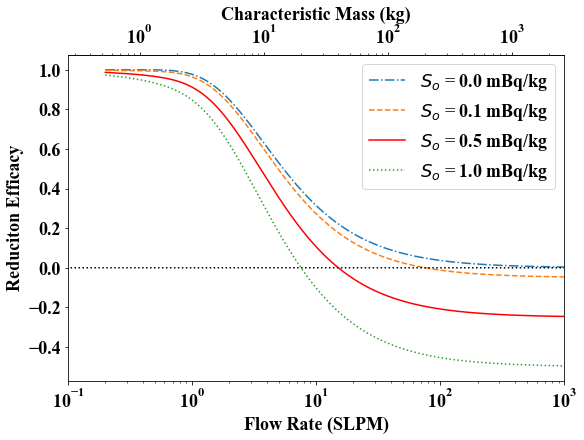

In [51]:
figure_layout(1)
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)

ax.semilogx(flowSpace, ectSpace00, '-.', label="$S_o$ = 0.0 mBq/kg")
ax.semilogx(flowSpace, ectSpace01, '--', label="$S_o$ = 0.1 mBq/kg")
ax.semilogx(flowSpace, ectSpace05, 'r',  label="$S_o$ = 0.5 mBq/kg")
ax.semilogx(flowSpace, ectSpace10, ':',  label="$S_o$ = 1.0 mBq/kg")

ax.plot(0*np.ones(len(flowSpace)), ':', c='k')

ax.set_xlim(0.1, 1000)
#ax.set_ylim(60, 100)
ax.set_xlabel('Flow Rate (SLPM)')
ax.set_ylabel('Reduciton Efficacy')
ax.legend()

def flow2miu(flowSpace):
    return (flowSpace*TauRN/Ka_ct)

def miu2flow(flowSpace):
    return (flowSpace)

secax = ax.secondary_xaxis('top', functions=(flow2miu, miu2flow))
secax.set_xlabel('Characteristic Mass (kg)')
plt.show()

In [52]:
#Efficacy of a a single-trap at 190K as a fuction of flow rates for a range of charcoal masses (charcoal actibity 0.5mBq/kg)
ectSpaceM5   = E_CT(flowSpace,5,  Ka_ct,TauRN,0.5,A_in)
ectSpaceM10  = E_CT(flowSpace,10, Ka_ct,TauRN,0.5,A_in)
ectSpaceM50  = E_CT(flowSpace,50, Ka_ct,TauRN,0.5,A_in)
ectSpaceM100 = E_CT(flowSpace,100,Ka_ct,TauRN,0.5,A_in)



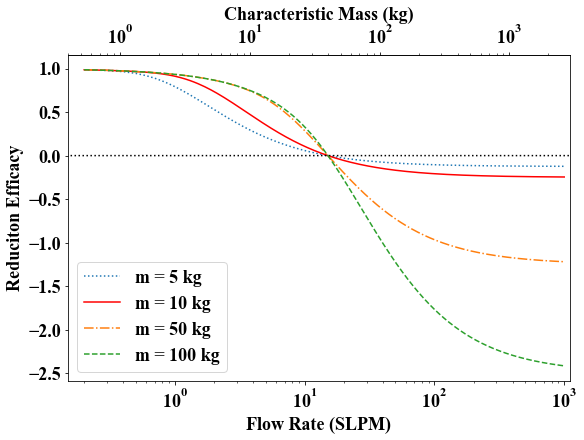

In [53]:
figure_layout(1)
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)

ax.semilogx(flowSpace, ectSpaceM5,  ':',  label="m = 5 kg")
ax.semilogx(flowSpace, ectSpaceM10, 'r',  label="m = 10 kg")
ax.semilogx(flowSpace, ectSpaceM50, '-.', label="m = 50 kg")
ax.semilogx(flowSpace, ectSpaceM100,'--', label="m = 100 kg")

ax.plot(0*np.ones(len(flowSpace)), ':', c='k')

ax.set_xlim(0.15, 1100)
#ax.set_ylim(60, 100)

ax.set_xlabel('Flow Rate (SLPM)')
ax.set_ylabel('Reduciton Efficacy')
ax.legend()

def flow2miu(flowSpace):
    return (flowSpace*TauRN/Ka_ct)

def miu2flow(flowSpace):
    return (flowSpace)

secax = ax.secondary_xaxis('top', functions=(flow2miu, miu2flow))
secax.set_xlabel('Characteristic Mass (kg)')
plt.show()

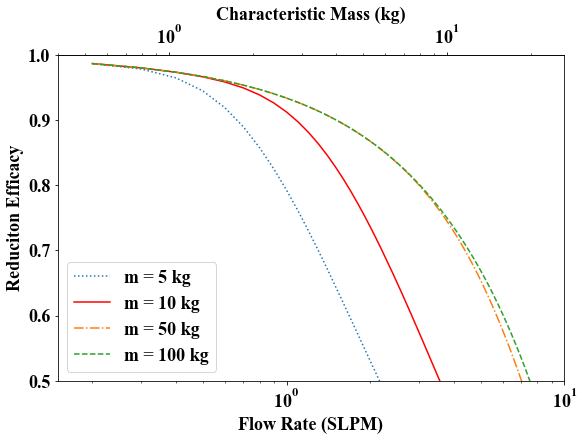

In [54]:
figure_layout(1)
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)

ax.semilogx(flowSpace, ectSpaceM5,  ':',  label="m = 5 kg")
ax.semilogx(flowSpace, ectSpaceM10, 'r',  label="m = 10 kg")
ax.semilogx(flowSpace, ectSpaceM50, '-.', label="m = 50 kg")
ax.semilogx(flowSpace, ectSpaceM100,'--', label="m = 100 kg")

ax.set_xlim(0.15, 10)
ax.set_ylim(0.5, 1)
ax.set_xlabel('Flow Rate (SLPM)')
ax.set_ylabel('Reduciton Efficacy')
ax.legend()

def flow2miu(flowSpace):
    return (flowSpace*TauRN/Ka_ct)

def miu2flow(flowSpace):
    return (flowSpace)

secax = ax.secondary_xaxis('top', functions=(flow2miu, miu2flow))
secax.set_xlabel('Characteristic Mass (kg)')
plt.show()

Maximum efficacy a single trap can reach: $\epsilon = \bigg[1-\frac{s_o \mu}{A_{in}}\bigg]\left(1-e^{-\frac{m}{\mu}}\right) = \epsilon_{max}\big(1-e^{-\frac{m}{\mu}}\big)$,
where $\epsilon_{max}=1-(A_{out})_{m\rightarrow\infty}/A_{in} = 1-\frac{s_o\mu}{A_{in}} \;\;\; =1-(s_o/A_{in})(f\tau /k_a).$

In [55]:
flowSpace10k = np.linspace(0.1,10000,10000) # range of flow rates up to 10k SLPM
flowSpace    = np.linspace(0.1,1000, 5000)  # range of flow rates up to 2600 SLPM

#max efficacy possible for various activities of charcoal
MaxRedSace001 = (0.001*flowSpace10k*TauRN/Ka_ct)/A_in
MaxRedSace005 = (0.01*flowSpace*TauRN/Ka_ct)/A_in
MaxRedSace01  = (0.1*flowSpace*TauRN/Ka_ct)/A_in
MaxRedSace05  = (0.5*flowSpace*TauRN/Ka_ct)/A_in


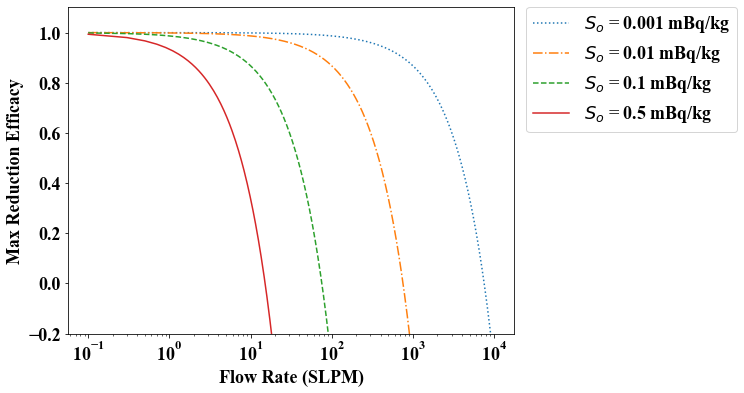

In [56]:
figure_layout(1)
plt.figure(figsize=(8,6))

plt.semilogx(flowSpace10k, (1-MaxRedSace001), ':',   label="$S_o$ = 0.001 mBq/kg")
plt.semilogx(flowSpace,    (1-MaxRedSace005), '-.',  label="$S_o$ = 0.01 mBq/kg")
plt.semilogx(flowSpace,    (1-MaxRedSace01),  '--',  label="$S_o$ = 0.1 mBq/kg")
plt.semilogx(flowSpace,    (1-MaxRedSace05),         label="$S_o$ = 0.5 mBq/kg")

plt.gca().legend(loc='upper right', bbox_to_anchor=(1.52, 1.03))
#plt.legend()
#plt.xlim(0.15, 10)
plt.ylim(-0.20, 1.10)
plt.ylabel('Max Reduction Efficacy')
plt.xlabel('Flow Rate (SLPM)')
plt.show()

In [57]:
#Efficacy of a a single-trap at 190K as a fuction of charcoal mass for a range of flow rates (charcoal actibity 0.5mBq/kg)
ectSpaceM05 = E_CT(0.5,massSpace,Ka_ct,TauRN,S_o,A_in)
ectSpaceM1  = E_CT(1,  massSpace,Ka_ct,TauRN,S_o,A_in)
ectSpaceM5  = E_CT(5,  massSpace,Ka_ct,TauRN,S_o,A_in)
ectSpaceM10 = E_CT(10, massSpace,Ka_ct,TauRN,S_o,A_in)
ectSpaceM15 = E_CT(15, massSpace,Ka_ct,TauRN,S_o,A_in)
ectSpaceM20 = E_CT(20, massSpace,Ka_ct,TauRN,S_o,A_in)

In [58]:
# characteristic masses of single-trap for various flow rates
m05 =miu(0.5, Ka_ct,TauRN)
m1  =miu(1,   Ka_ct,TauRN)
m5  =miu(5,   Ka_ct,TauRN)
m10 =miu(10,  Ka_ct,TauRN)
m15 =miu(15,  Ka_ct,TauRN)
m20 =miu(20,  Ka_ct,TauRN)


In [59]:
figure_layout(1)
plt.figure(figsize=(8,6))

plt.semilogx(massSpace, ectSpaceM05, 'r',                               label="flow = 0.5 slpm, $\mu$ = %.1f kg" %m05)
plt.semilogx(massSpace, ectSpaceM1 , ':',                               label="flow = 1   slpm, $\mu$ = %.1f kg" %m1 )
plt.semilogx(massSpace, ectSpaceM5 , '-.',                              label="flow = 5   slpm, $\mu$ = %i   kg" %m5 )
plt.semilogx(massSpace, ectSpaceM10, '--',                              label="flow = 10  slpm, $\mu$ = %i   kg" %m10)
plt.semilogx(massSpace, ectSpaceM15, linestyle='--', dashes=(4,10),     label="flow = 15  slpm, $\mu$ = %i   kg" %m15)
plt.semilogx(massSpace, ectSpaceM20, linestyle='--', dashes=(5,2,20,2), label="flow = 20  slpm, $\mu$ = %i   kg" %m20)

plt.gca().legend(loc='upper right', bbox_to_anchor=(1.7, 1.03))
#plt.legend(loc='upper right')
plt.xlim(0.9, 700)
#plt.ylim(50, 100)
plt.ylabel('Reduction Efficacy')
plt.xlabel('Charcoal Mass (kg)')
plt.show()

### Performance of a VSA system for TPC detectors ignoring charcoal activity

simulation that calculates the radon dynamics of a VSA in the absense of charcoal activity according to:
    $(N_{out})_{n} = (N_{in})_{n}(1-\eta_{vsa})f_{out}$

and  $(N_{in})_{n+1} = N_o + (1-\epsilon_{st})\left[(N_{in})_n(1-\eta_{vsa})f_{purge} +(N_{loop})_n\right]$ 

where $(N_{loop})_n = \left[(N_{in})_{n}\eta_{vsa}e^{-\frac{T_{feed}}{\tau }}\right]$ note that given that the breakthrough time in the purge column is extected to be about an order of magnitude shorter than the breakthrough time in the feed column, radon reduction in purge column is negligible and the simulation assume that radon atoms that were trapped in the feed stage and did not decay will end up in the feedback loop

#### Input activity from LZ in one feed time: $A_{feed} = \rho_{Xe}FS_{Xe}T_{feed}$

In [60]:
#activity of inlet radon in one feed time
T_feed = 60 #min
rho_xe = 5.86 # stp density of xenon g/l
F_LZ = 500 # LZ flow rate 500 SLPM
S_Xe = 2 #activity of radon in Xe microBq/kg
Time = T_feed # feed time in min

def inletRnActivity(densityXe, detFlow, activityXe, time):
    return (1/1000)*(densityXe/1000)*activityXe*detFlow*time # activity in mBq/feed

Aio_2 = inletRnActivity(rho_xe, F_LZ, S_Xe, Time) # activity in mBq/feed
print("Activity of inlet radon in one feed time for 2microBq/kg xenon activity is %.4f mBq/feed" %(Aio_2)) # activity in mBq/feed

Aio_5 = inletRnActivity(rho_xe, F_LZ, 5, Time) # activity in mBq/feed
print("Activity of inlet radon in one feed time for 5microBq/kg xenon activity is %.4f mBq/feed" %(Aio_5)) # activity in mBq/feed

Activity of inlet radon in one feed time for 2microBq/kg xenon activity is 0.3516 mBq/feed
Activity of inlet radon in one feed time for 5microBq/kg xenon activity is 0.8790 mBq/feed


In [127]:
# Performace of the VSA as a function of the swing time this does not take into account specific activity of charcoal
# Parameters

nLoops = 1000 # number of swings

Evsa = 0.99 # VSA feed column remanent fraction, percentage of inlet radon trapped by feed column

# this script is only with a VSA and without a single trap so Ect (efficiency of the single-trap) is taken to be zero
Ect = 0 # radon removal efficacy of the feedback-loop single-trap, (1-Ect) percentage of radon escaping the cold trap

F_leave = 0.9 # fraction of xenon leaving the swing system
F_purge = 0.1 # fraction of xenon for purging the other column of the swing system (F_leave + F_purge = 1)
Trn = 132*60 # Rn lifetime in unit of minute (note this is lifetime not half life)
TfSpace = np.linspace(30,600,100) # range of feed times
T_feed = 60 # one swing time in unit of minute in min
Ni = inletRnActivity(rho_xe, F_LZ, S_Xe, Time)*Trn*60 # inital radon counts per swing time (activity[mBq/feed]*Rn_lifetime [sec])
Nio = Ni # constant supply of Rn

# pre-allocation sim needed variables
Nout = np.zeros(nLoops) # array of radon count escaped in each feed
Nloop = np.zeros(nLoops) # array of radon count trapped during each feed

# pre-allocating a variable to store Rn counts for each feed time
Nout_st = np.zeros(len(TfSpace))

# simulation starts:
# looping over the feed times
for idx, t in enumerate(TfSpace):
    #looping over the feeds
    for i in range(0,nLoops):
        # number of radon escaped the swing system
        Nout[i] = F_leave*(1-Evsa)*Ni

        # Nin changes as we loop over the feed cycle time until we reach steady state
        Ni = (1-Ect)*(F_purge*(1-Evsa)*Ni
                      + (Evsa*Ni)*np.exp(-t/Trn))  +   Nio
    Nout_st[idx] = Nout[-1]



In [131]:
figure_layout(1)

fig, ax = plt.subplots(figsize=(8,6))
ax.semilogx(TfSpace, Nout_st/Nio)
ax.set_xscale('log')
ax.set_xticks([30, 60, 100, 600])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xlabel('Feed Cycle Time [min]')
ax.set_ylabel('$(N_{out})_{ss}/N_{det}$')

ax.axhline(y=0.55, xmax = 0.28, color='r', linestyle='--')
ax.axvline(x=60, ymax = 0.75, color='r', linestyle='--')
ax.plot(60, 0.55, 'o', color='r')
ax.text(65, 0.57, '55%', dict(size=15), color='r',)

Text(65, 0.57, '55%')

#### Breakthrough time of a feed column

The breakthrough time of a trap can be calculated from $t_b = m k_a / f$

In [80]:
# returns the mass of the charcoal trap to achivie a given breakthrough time for at given flow rate
T_feed = 60 #min (chosen to be so based on this calculation, can be made longer)
F_LZ = 500 # LZ flow rate 500 SLPM

T_breakthrough = 1.5*T_feed
# not the cryo variable is 1 or 0 
# indicating weather the trap is at room temp (Ka_wt = 500l/kg at 295K) or at cyro temp (Ka_ct = 3000 #l/kg at 190K)
def massCharForBreaktrhoughTime(breakthroughTime, trapFlowRate, cryo):
    if  cryo == 'cold': return breakthroughTime*trapFlowRate / Ka_ct
    if  cryo == 'warm': return breakthroughTime*trapFlowRate / Ka_wt
    else: print("cryo needs to be cold or warm as a string")
        
massChar70_C = massCharForBreaktrhoughTime(T_breakthrough, F_LZ, 'cold')
massChar70_W = massCharForBreaktrhoughTime(T_breakthrough, F_LZ, 'warm')  

print('%.2f kg charcoal is needed to achieve breakthrough(feed) time of %.2f(%.2f) min in cryo temperature trap' %(massChar70_C, T_breakthrough, T_feed))
print('%.2f kg charcoal is needed to achieve breakthrough(feed) time of %.2f(%.2f) min in room temperature trap' %(massChar70_W, T_breakthrough, T_feed))

15.00 kg charcoal is needed to achieve breakthrough(feed) time of 90.00(60.00) min in cryo temperature trap
90.00 kg charcoal is needed to achieve breakthrough(feed) time of 90.00(60.00) min in room temperature trap


#### Total trap radon contribution in one feed: $N_{trap} =  \frac{s_om}{2t_b}T_{feed}^2$

In [64]:
# Effective radon contribution from charcoal due to it's specific activity (COUNTS N)
def charcoalContributionCounts(s_o, m, T_break, T_swing):
    return (s_o*m/(60*T_break))*((60*T_swing)*(60*T_swing)/2)

simulation that calculates the radon dynamics of a VSA in the absense of charcoal activity according to:
    $(N_{out})_{n} = (N_{in})_{n}(1-\eta_{vsa})f_{out} + (N_{trap})_{feed}f_{out}$ 

and $(N_{in})_{n+1} = N_o + (1-\epsilon_{st})\Big[ (N_{in})_n(1-\epsilon_{vsa})f_{purge} + (N_{loop})_n  +(N_{trap})_{purge} + (N_{trap})_{feed}f_{purge})\Big]$

In the absense of charcoal activity the simulation  calculates the radon dynamics of a RRS according to:
    $(N_{out})_{n} = (N_{in})_{n}(1-\eta_{vsa})f_{out}$ 

and $(N_{in})_{n+1} = N_o + (1-\epsilon_{st})\Big[ (N_{in})_n(1-\epsilon_{vsa})f_{purge} + (N_{loop})_n\Big]$

where $(N_{loop})_n = \left[(N_{in})_{n}\eta_{vsa}e^{-\frac{T_{feed}}{\tau }}\right]$

The script below has the full simulation with charcoal emanation implemented, however if $s_o$ taken to be 0, it reduced to the simpler no charcoal emanation case.

In [132]:
# Parameters
nLoops = 1000 # number of swings

Evsa = 0.99 # radon removal remanent fraction of the swing system 

# this script is only with a VSA and without a single trap so Ect (efficacy of the single-trap) is taken to be zero can be changed if needed
Ect = 0 # radon removal efficacy of the cold trap, percentage of radon trapped by cold trap

F_leave = 0.9 # fraction of cleaned air (xenon) leaving the swing system
F_purge = (1-F_leave) # fraction of cleaned air (xenon) for purging the other colume of the swing system (F_leave + F_purge = 1)
Trn = 132*60 # Rn lifetime in unit of minute (note this is lifetime not half life)
So = 0 #specifica activity of the charcoal in mBq/kg

flowRateLZ = 500 #SLPM 
#note that for 0.9/0.1 feed purge ratio the flow rate through the VSA column is actually 1.1*flowRateLZ
flowRateColumnVSA = 1.1*flowRateLZ 

T_feed = 60 # one swing time in unit of minute in min
TB = 1.5*T_feed # breakthrough time of the VSA in kg

purgeTB_frac = 0.1 # breakthrough time in purge column is about 10 times faster than feed column

# mass of the vsa charcoal
Mvsa = massCharForBreaktrhoughTime(TB, flowRateColumnVSA, 'warm')

# constant supply of input radon number from detector in one feed 
# radon atoms coming in a single feed 0.3516mBq/feed (calculated earlier in the notebook) time tau in sec gives radon counts)
Nio = inletRnActivity(rho_xe, flowRateLZ, S_Xe, Time)*Trn*60  # it is for 2microBq/kg xe activity

Ni = Nio # initializing Ni that goes into the VSA

# pre-allocation sim needed variables
Nout = np.zeros(nLoops) # array of radon count escaped in each feed
Nloop = np.zeros(nLoops+1) # array of radon count trapped during each feed it is (+1) b/c initialization of loop below

#number of radon atoms from the feed column in one feed time
N_ch_feed = charcoalContributionCounts(So, Mvsa, TB, T_feed) 

#number of radon atoms from the purge column in one feed time (note the difference b/w feed & purge columns is 
#only due to the different brakthrough times - breakthrough time of the purge column is about an order of magnitude
# shorter compared to the breakthrough time of the feed column)
N_ch_purge = charcoalContributionCounts(So, Mvsa, purgeTB_frac*TB, T_feed)

#defining the first loop element when purge column is not saturated. It has no contribution from the input of detector
Nloop[0] = F_purge*((1-Evsa)*Ni + N_ch_feed) + N_ch_purge 

# simulation starts:
#looping over the feeds
for i in range(0,nLoops):
    # estimate number of radon escaped the swing system
    Nout[i] = F_leave*((1-Evsa)*(Ni) + N_ch_feed)
    
    #number of radon atoms in the loop as we loop over the feed cycle times
    Nloop[i+1] = F_purge*((1-Evsa)*Ni + N_ch_feed) + (Evsa*Ni)*np.exp(-T_feed/Trn) + N_ch_purge
   
    # Nin changes as we loop over the feed cycle time until we reach steady state
    Ni         = Nio + (1-Ect)*(F_purge*(1-Evsa)*Ni + F_purge*N_ch_feed
                                + (Evsa*Ni)*np.exp(-T_feed/Trn) 
                                + N_ch_purge)
    

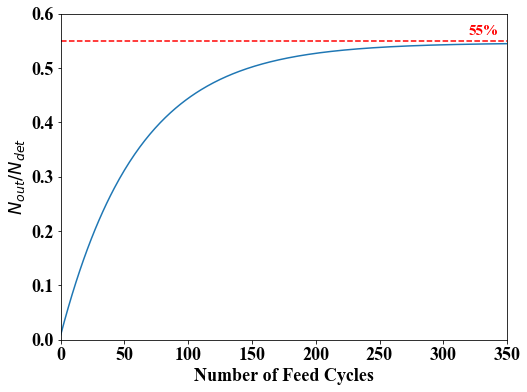

In [135]:
# do plot - radon escaping the swing system asymptotically reaching a constant value.
# this value indicates the performance of the swing system
figure_layout(1)
plt.figure(figsize=(8,6))

plt.plot(Nout/Nio)
#plt.plot(np.linspace(1,nLoops,nLoops),Nloop/Nio)

plt.axhline(y=0.55, color='r', linestyle='--')
plt.text(320, 0.56, '55%', dict(size=15), color='r',)

plt.xlabel('Number of Feed Cycles')
#plt.ylabel('Rn in the Loop [mBq/feed]')
plt.ylabel('$N_{out}/N_{det}$')
#plt.title('$A_{in} = 20 mBq$  $S_o = 0.02mBq/kg$')
plt.xlim(0,350)
plt.ylim(0, 0.6)
plt.show()

In [67]:
#fraction of radon escaping in steady state
print("Fraction of radon escaping in steady state RRS with vsa inlet remanent fraction %.2f and single-trap efficacy %.2f and charcoal activity %.3f is %.2f" %(Evsa, Ect, So, (Nout/Nio)[-1]))
#activity of radon in the loop at steady state
print("And the steady state activity of radon in the loop at steady state is %.3f mBq/feed" %(Nloop[-1]/(Trn*60)))

Fraction of radon escaping in steady state RRS with vsa inlet remanent fraction 0.99 and single-trap efficacy 0.00 and charcoal activity 0.000 is 0.55
And the steady state activity of radon in the loop at steady state is 20.994 mBq/feed


## Map out the RRS system efficacy by varying the $\eta_{vsa}$ and $\epsilon_{single-trap}$ 

In the contour figure, x-axis is ($\epsilon_{single-trap}$), and y-axis is ($\eta_{vsa}$) 

Note that unlike the previous simulation this has no option of including cahrcoal activity for the vsa columns

here $(N_{out})_{n} = (N_{in})_{n}(1-\eta_{vsa})f_{out}$

and $(N_{in})_{n+1} = N_o + (1-\epsilon_{st})\left[(N_{in})_n(1-\eta_{vsa})f_{purge} +(N_{loop})_n\right]$

where $(N_{loop})_n = \left[(N_{in})_{n}\eta_{vsa}e^{-\frac{T_{feed}}{\tau }}\right]$

In [46]:
# Parameters
nLoops = 1000 # number of swings
Evsa = np.linspace(0,1,2001) # array of radon removal efficiency of the swing system in one swing, percentage of radon trapped by VSA
Ect = np.linspace(0,1,2001) # array of radon removal efficiency of the cold trap, percentage of radon trapped by cold trap
F_leave = 0.9 # fraction of cleaned air (xenon) leaving the swing system
F_purge = 0.1 # fraction of cleaned air (xenon) for pursing the other colume of the swing system (F_leave + F_purge = 1)
Trn = 132*60 # # Rn lifetime in unit of minute (note this is lifetime not half life)
T_feed = 60 # # one swing time in unit of minute
Nio = 0.3516*Trn*60 # inital radon counts - it can be any number
Ni = Nio # constant supply of Rn


# pre-allocation sim needed variables
Nout_matrix = np.zeros([len(Evsa) ,nLoops]) # matrix of radon count escaped in each swing
Ntot = np.zeros([len(Evsa),len(Ect)]) # matrix of total radon count escaped
Evsa_matrix = np.zeros([len(Evsa),len(Ect)]) # Evsa matrix
E_matrix = np.zeros([len(Evsa),len(Ect)]) # Ect matrix

# simulation starts:
for idx2, e2 in enumerate(Ect):
    for i in range(0,nLoops):
        # estimate number of radon escaped the swing system
        Nout_matrix[:,i] = F_leave*(1-Evsa)*Ni

        # Nin changes as we loop over the feed cycle time until we reach steady state      
        Ni = ( (1-e2)*(F_purge*(1-Evsa)*Ni 
                     + (Evsa*Ni)*np.exp(-T_feed/Trn))  
               + Nio )
    # save the escaped radon count at asymptotic value to Ntot
    Ntot[:,idx2] = Nout_matrix[:,-1]
    Evsa_matrix[:,idx2] = Evsa
    
for idx1, e1 in enumerate(Evsa):
    E_matrix[idx1] = Ect*e1


In [47]:
# do plot
figure_layout(case_id = 1, font = 'times new roman', weight = 'regular', size = 18)
plt.figure(figsize=(8,6))

manual_locations = [(0.35, 0.2), (0.4, 0.4), (0.5, 0.5), (0.6, 0.6), (0.7, 0.6),  (0.7, 0.7),(0.7, 0.8),(0.7, 0.9)]
cp = plt.contour(Evsa, Ect, 1-Ntot/Nio, levels=[0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], cmap='RdPu')
plt.clabel(cp, inline=True, fontsize=14, manual=manual_locations)

plt.imshow(1-Ntot/Nio, extent=[0, 1, 0, 1], origin='lower', alpha=1)
cbar = plt.colorbar();


plt.axhline(y=0.9, color='white', linestyle='--')
plt.axvline(x=0.1, color='white', linestyle='--')
plt.plot(0.1, 0.9, 'o', color='white')
plt.text(0.065, 0.85, '52%', dict(size=15), color='white',)

#cbar.set_label('($\epsilon_{RRS}$) \n RRS Efficiency', rotation=90)
#plt.xlabel('($\epsilon_{st}$) \n Single-Trap Efficiency')
#plt.ylabel('VSA Efficiency \n ($\epsilon_{vsa}$)')

cbar.set_label('RRS Efficacy', rotation=90)
plt.xlabel('Single-Trap Efficacy')
plt.ylabel('VSA Remanent Fraction')
plt.xscale('log')
plt.ylim([0,1])
plt.xlim([0.01,1])
plt.show()

/Users/SU279/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


## Map out the swing system performance in LZ by varying the $\eta_{vsa}$ and $\epsilon_{single-trap}$

In the contour figure, x-axis is (1 - $\epsilon_{single-trap}$), and y-axis is (1 - $\eta_{vsa}$) instead

Equations used for calculating the total efficiency of the RRS for various $\epsilon_{single-trap}$ and $\eta_{vsa}$ are the same as in the previous plot. This contour plot incorporates the $\epsilon_{RRS}$ found from the sims to give the steady state radon reduction achieved with in LZ $\epsilon_{LZ}$ with that RRS

In [48]:
# Parameters
nLoops = 1000 # number of swings
Evsa = np.linspace(1,0,2001) # array of radon removal efficiency of the swing system in one swing, percentage of radon trapped by VSA
Ect = np.linspace(1,0,2001) # array of radon removal efficiency of the cold trap, percentage of radon trapped by cold trap
F_leave = 0.9 # fraction of cleaned air (xenon) leaving the swing system
F_purge = 0.1 # fraction of cleaned air (xenon) for pursing the other colume of the swing system (F_leave + F_purge = 1)
Trn = 132*60 # # Rn lifetime in unit of minute (note this is lifetime not half life)
T_feed = 60 # # one swing time in unit of minute
Nio = 0.3516*Trn*60 # inital radon counts - it can be any number
Ni = Nio # constant supply of Rn



# pre-allocation sim needed variables
Nout_matrix = np.zeros([len(Evsa) ,nLoops]) # matrix of radon count escaped in each swing
Ntot = np.zeros([len(Evsa),len(Ect)]) # matrix of total radon count escaped
Evsa_matrix = np.zeros([len(Evsa),len(Ect)]) # Evsa matrix
Ect_matrix = np.zeros([len(Evsa),len(Ect)]) # Ect matrix

# simulation starts:
for idx2, e2 in enumerate(Ect):
    for i in range(0,nLoops):
        # number of radon escaped the swing system
        Nout_matrix[:,i] = F_leave*(1-Evsa)*Ni

        # Nin changes as we loop over the feed cycle time until we reach steady state
        Ni = ( (1-e2)*(F_purge*(1-Evsa)*Ni
                       + (Evsa*Ni)*np.exp(-T_feed/Trn)) 
               + Nio )
    # save the escaped radon count at asymptotic value to Ntot
    Ntot[:,idx2] = Nout_matrix[:,-1]
    Evsa_matrix[:,idx2] = Evsa
    
for idx1, e1 in enumerate(Evsa):
    Ect_matrix[idx1] = Ect


In [49]:

RoXeAtSTP     = 5.86 # desity of xenon at STP in g/l
totalXeMassLZ = 10000000 # g which is 10 metric tonnes
FlowRateLZ    = 500 # SLPM nominal LZ volumetric flow rate

#turnaround time in LZ in min
Tlz = totalXeMassLZ/(FlowRateLZ*RoXeAtSTP)

def radonReductionInDet(TurnaroundTime, radonLifeTime, eff): 
    if eff == 'perfect':
        return radonLifeTime/(TurnaroundTime+radonLifeTime)
    else:
        return radonLifeTime/(TurnaroundTime/eff+radonLifeTime)

#Rn reduction in LZ with a perfect RRS at 500 SLPM
#lz_Rn_red_perfect = (Trn / (Tlz + Trn))
lz_Rn_red_perfect = radonReductionInDet(Tlz, Trn, 'perfect')

#Rn reduction in LZ with a realistic RRS with efficiency given by (1-Ntot/Nio) 
#lz_Rn_red = (Trn / (Tlz/(1-Ntot/Nio) + Trn))
lz_Rn_red = radonReductionInDet(Tlz, Trn, (1-Ntot/Nio))

/Users/SU279/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if __name__ == '__main__':
/Users/SU279/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


/Users/SU279/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: aspect is not supported for Axes with xscale=linear, yscale=log
  fig.canvas.print_figure(bytes_io, **kw)


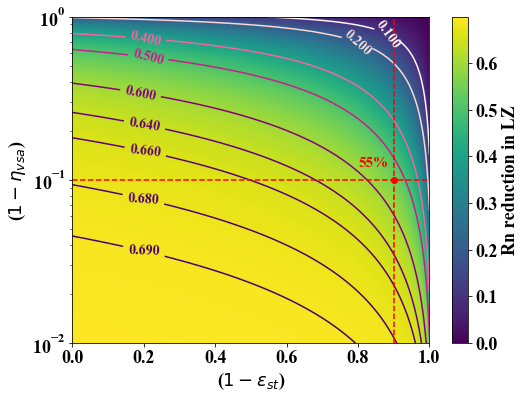

In [50]:
# do plot
figure_layout(case_id = 1, font = 'times new roman', weight = 'regular', size = 18)
plt.figure(figsize=(8,6))

manual_locations = [(0.2, 0.02), (0.2, 0.7), (0.2, 0.1), (0.2, 0.2), (0.2, 0.4), (0.2, 0.5),  (0.2, 0.1),(0.8, 0.7),(0.9, 0.8)]
cp = plt.contour(1-Evsa, 1-Ect, lz_Rn_red, levels=[0.1, 0.2, 0.4, 0.5, 0.6, 0.64, 0.66, 0.68, 0.69], cmap='RdPu')
plt.clabel(cp, inline=True, fontsize=14, manual=manual_locations)

plt.imshow(lz_Rn_red, extent=[0, 1, 0, 1], origin='lower', alpha=1)
cbar = plt.colorbar();

plt.axhline(y=0.1, color='r', linestyle='--')
plt.axvline(x=0.9, color='r', linestyle='--')
plt.plot(0.9, 0.1, 'ro')
plt.text(0.8, 0.12, '55%', dict(size=15), color='r',)

#cbar.set_label('$\epsilon_{LZ}$ \n Rn reduction in LZ', rotation=90)
plt.xlabel('($1-\epsilon_{st}$)')
plt.ylabel('($1-\eta_{vsa}$)')

cbar.set_label('Rn reduction in LZ', rotation=90)
#plt.xlabel('Rn escaping Single-Trap')
#plt.ylabel('Inlet Rn escaping VSA')
plt.yscale('log')
plt.ylim([0.01,1])
plt.xlim([0,1])
plt.show()

### Performance of a  VSA with remanent fraction of 0.9 that has  a  single-trap in the feedback loop with efficacy of 0.1 as a function of charcoal activity

In [68]:
# Performance of the VSA as a function of specific activity of charcoal
# Parameters
nLoops = 1000 # number of swings
Evsa = 0.9 # VSA (feed column) remanent fraction, percentage of inlet radon trapped by VSA
Ect = 0.1 # radon removal efficiency of the cold trap, percentage of radon trapped by cold trap
F_leave = 0.9 # fraction of cleaned air (xenon) leaving the swing system
F_purge = (1-F_leave) # fraction of cleaned air (xenon) for purging the other colume of the swing system (F_leave + F_purge = 1)
Trn = 132*60 # Rn lifetime in unit of minute (note this is lifetime not half life)


T_feed = 60
TB = 1.5*T_feed # one swing time in unit of minute

purgeTB_frac = 0.1 # breakthrough time in purge column is about 10 times faster than feed column


SoSpace = np.linspace(0, 0.5, 2000)

flowRateLZ = 500 #SLPM 

# mass of the vsa not that for 0.9/0.1 feed purge ratio the flow rate through the VSA column is actually 1.1*flowRateLZ
flowRateColumnVSA = 1.1*flowRateLZ

Mvsa = massCharForBreaktrhoughTime(TB, flowRateColumnVSA, 'warm') # mass of the vsa

#assuming 2microBq/kg inlet xenon activity
Nio_2 = inletRnActivity(rho_xe, flowRateLZ, 2, T_feed)*Trn*60 # inital radon counts - number of radon atoms per feed time activity*tau(sec) asumption (steady state)
Ni_2 = Nio_2 # constant supply of Rn

#assuming 5microBq/kg inlet xenon activity
Nio_5 = inletRnActivity(rho_xe, flowRateLZ, 5, T_feed)*Trn*60 # inital radon counts - number of radon atoms per feed time activity*tau(sec) asumption (steady state)
Ni_5 = Nio_5 # constant supply of Rn

# pre-allocation sim needed variables
Nout_2 = np.zeros(nLoops) # array of radon count escaped in each swing
Nloop_2 = np.zeros(nLoops) # array of radon count trapped during each swing
Nout_5 = np.zeros(nLoops) # array of radon count escaped in each swing
Nloop_5 = np.zeros(nLoops) # array of radon count trapped during each swing

Nout_st_2 = np.zeros(len(SoSpace))
Nloop_st_2 = np.zeros(len(SoSpace))
Nout_st_5 = np.zeros(len(SoSpace))
Nloop_st_5 = np.zeros(len(SoSpace))

# simulation starts:
for idx, s in enumerate(SoSpace):
    for i in range(0,nLoops):
        
        #number of radon atoms from the feed column in one feed time
        N_trap_feed = charcoalContributionCounts(s, Mvsa, TB, T_feed) # feed column
        
        #number of radon atoms from the purge column in one feed time (note the difference b/w feed & purge columns is 
        #only due to the different brakthrough times - breakthrough time of the purge column is about an order of magnitude
        #shorter compared to the breakthrough time of the feed column)
        N_trap_purge = charcoalContributionCounts(s, Mvsa, purgeTB_frac*TB, T_feed) # purge column
        
        #number of radon escaped the swing system
        Nout_2[i] = F_leave*((1-Evsa)*Ni_2 + N_trap_feed)
        Nout_5[i] = F_leave*((1-Evsa)*Ni_5 + N_trap_feed)


        # Nin changes as we loop over the feed cycle time until we reach steady state
        Ni_2 = (   (1-Ect)*(F_purge*(1-Evsa)*Ni_2 + F_purge*N_trap_feed
                            + (Evsa*Ni_2)*np.exp(-T_feed/Trn) 
                            + N_trap_purge)
                   + Nio_2  )
        
        Ni_5 = (   (1-Ect)*(F_purge*(1-Evsa)*Ni_5 + F_purge*N_trap_feed
                          + (Evsa*Ni_5)*np.exp(-T_feed/Trn) 
                          + N_trap_purge) 
                   + Nio_5  )
        
    Nout_st_2[idx] = Nout_2[-1]
    Nout_st_5[idx] = Nout_5[-1]

In [69]:
figure_layout(1)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(SoSpace, 1-Nout_st_2/Nio_2,       label='$s_{Xe}= 2 \mu Bq /kg$')
ax.plot(SoSpace, 1-Nout_st_5/Nio_5, '--' ,label='$s_{Xe}= 5 \mu Bq /kg$')

ax.axhline(y=0.4, color='r', xmax=0.45, linestyle='--')
ax.axhline(y=0.47, color='r', xmax=0.45, linestyle='--')
ax.axvline(x=0.03, color='r', ymax=0.89,  linestyle='--')
ax.plot(0.03, 0.4, 'ro')
ax.plot(0.03, 0.47, 'ro')

#ax.set_yscale('log')
ax.set_yticks([-0.5, 0.2, 0.4, 0.5, 0.6])
#ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_yticklabels(['-0.5', '0.2', '0.4', '0.5','0.6'])
ax.set_xscale('log')
ax.set_xticks([0.001, 0.01, 0.1, 0.5])
ax.set_xticklabels(['', '0.01', '0.1', '0.5'])
#ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xlabel('Charcoal Activity [mBq/kg]')
ax.set_ylabel('RRS Efficacy')
#plt.grid(True)
plt.xlim(0.003, 0.65)
plt.ylim(-0.6, 0.65)
ax.legend()

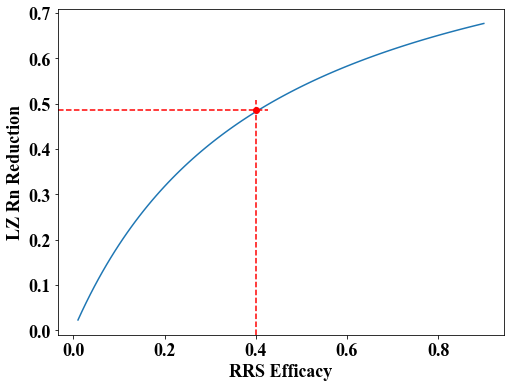

In [70]:
RoXeAtSTP     = 5.86 # desity of xenon at STP in g/l
totalXeMassLZ = 10000000 # g which is 10 metric tonnes
FlowRateLZ    = 500 # SLPM nominal LZ volumetric flow rate

TauRN     = 5.516*24*60 # radon lifetime in min

#turnaround time in LZ in days
Tlz = totalXeMassLZ/(FlowRateLZ*RoXeAtSTP)
fracRNescRRSspace = np.linspace(0.1, 0.99, 100)
effLZspace  = TauRN/(TauRN + Tlz/(1-fracRNescRRSspace))

figure_layout(1)
plt.figure(figsize=(8,6))
plt.plot(1-fracRNescRRSspace,effLZspace)

plt.axhline(y=0.485, color='r', xmax=0.47, linestyle='--')
plt.axvline(x=0.4, color='r', ymax=0.72, linestyle='--')
plt.plot(0.4, 0.485, 'ro')

plt.ylabel('LZ Rn Reduction')
plt.xlabel('RRS Efficacy')
plt.show()

### Performance of a VSA with remanent fraction of 0.9 that has single-trap with efficacy 0.1 in the feedback loop where VSA charcoal activity of 0.1mBq/kg

In [71]:
# Parameters
nLoops = 1000 # number of swings
Evsa = 0.9 # VSA (feed column) remanent fraction, percentage of inlet radon trapped by VSA
Ect = 0.1 # radon removal efficacy of the cold trap, percentage of radon trapped by cold trap
F_leave = 0.9 # fraction of cleaned air (xenon) leaving the swing system
F_purge = (1-F_leave) # fraction of cleaned air (xenon) for purging the other colume of the swing system (F_leave + F_purge = 1)
Trn = 132*60 # Rn lifetime in unit of minute (note this is lifetime not half life)
So = 0.1 #specifica activity of the charcoal in VSA mBq/kg

T_feed = 60 # one swing time in unit of minute in min
TB = 1.5*T_feed # breakthrough time of the VSA in kg

purgeTB_frac = 0.1 # breakthrough time in purge column is about 10 times faster than feed column

flowRateLZ = 500 #SLPM 
# mass of the vsa not that for 0.9/0.1 feed purge ratio the flow rate through the VSA column is actually 1.1*flowRateLZ
flowRateColumnVSA = 1.1*flowRateLZ
Mvsa = massCharForBreaktrhoughTime(TB, flowRateColumnVSA, 'warm') # mass of the vsa

Nio = inletRnActivity(rho_xe, flowRateLZ, 2, T_feed)*Trn*60 # inital radon counts - number of radon atoms per feed time activity*tau(sec) asumption (steady state)

# constant supply of input radon number from detector in one feed 
# of radon atoms coming in a single feed 0.3516mBq/feed time tau in sec gives radon counts)
Nio = inletRnActivity(rho_xe, flowRateLZ, S_Xe, Time)*Trn*60 

Ni = Nio # initializing Ni that goes into the VSA

# pre-allocation sim needed variables
Nout = np.zeros(nLoops) # array of radon count escaped in each feed
Nloop = np.zeros(nLoops+1) # array of radon count trapped during each feed

#number of radon atoms from the feed column in one feed time
N_ch_feed = charcoalContributionCounts(So, Mvsa, TB, T_feed)

#number of radon atoms from the purge column in one feed time (note the difference b/w feed & purge columns is 
#only due to the different brakthrough times - breakthrough time of the purge column is about an order of magnitude
#shorter compared to the breakthrough time of the feed column)
N_ch_purge = charcoalContributionCounts(So, Mvsa, purgeTB_frac*TB, T_feed)

#defining the first loop element when purge column is not saturated
Nloop[0] = F_purge*((1-Evsa)*Ni + N_ch_feed) + N_ch_purge 

# simulation starts:
for i in range(0,nLoops):
    # number of radon escaped the swing system after ith feed
    Nout[i] = F_leave*((1-Evsa)*(Ni) + N_ch_feed)
    
    #number of radon atoms in the loop as we loop over the feed cycle times
    Nloop[i+1] = ( F_purge*((1-Evsa)*Ni + N_ch_feed)
                   + (Evsa*Ni)*np.exp(-T_feed/Trn) 
                   + N_ch_purge )
   
    # Nin changes as we loop over the feed cycle time until we reach steady state
    Ni  = ( (1-Ect)*(F_purge*(1-Evsa)*Ni + F_purge*N_ch_feed
                     + (Evsa*Ni)*np.exp(-T_feed/Trn)  
                     + N_ch_purge)
             + Nio )

In [72]:
#fraction of radon escaping in steady state
print("Fraction of radon escaping in steady state RRS with vsa effectiveness %.2f and single-trap efficiency %.2f and charcoal activity %.3f is %.2f" %(Evsa, Ect, So, (Nout/Nio)[-1]))
#activity of radon in the loop at steady state
print("And the activity of radon in the loop at steady state is %.3f mBq/feed" %(Nloop[-1]/(Trn*60)))

Fraction of radon escaping in steady state RRS with vsa effectiveness 0.90 and single-trap efficiency 0.10 and charcoal activity 0.100 is 0.86
And the activity of radon in the loop at steady state is 3.047 mBq/feed


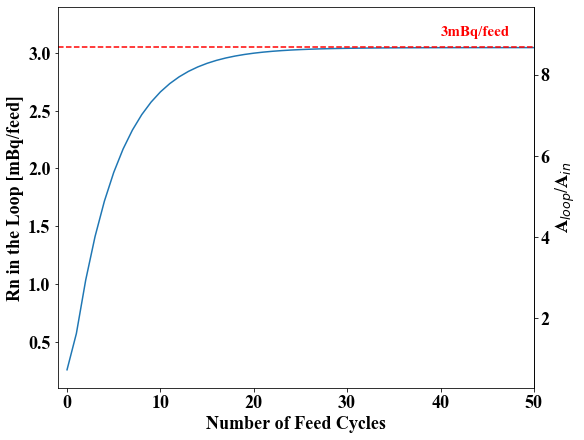

In [73]:
#activity of radon in the loop 
Aloop = Nloop/(Trn*60)
figure_layout(1)
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
ax.plot(Aloop)

#plt.plot(3.05*np.ones(len(Aloop)), '--', c='r')
plt.axhline(y=3.05, color='r', linestyle='--')
plt.text(40, 3.15, '3mBq/feed', dict(size=15), color='r',)

ax.set_xlabel('Number of Feed Cycles')
ax.set_xlim(-1,50)
ax.set_ylim(0.1,3.4)
ax.set_ylabel('Rn in the Loop [mBq/feed]')

def AloopAin(Aloop):
    return (Aloop*(Trn*60)/Nio)

def AinAloop(Aloop):
    return (Aloop)

secax = ax.secondary_yaxis('right', functions=(AloopAin, AinAloop))
secax.set_ylabel('A$_{loop}$/A$_{in}$')
plt.show()

### Efficacy of a single-trap in the feedback loop of a VSA in LZ

Efficacy of the trap: $(A_{out})_{feed} = (A_{in})_{feed}\,e^{-\frac{mk_a}{f\tau }} + (A_{trap})_{feed}$

where $(A_{trap})_{feed} = \frac{(N_{trap})_{feed}}{\tau}= \frac{T_{feed}\,A_{trap}}{\tau}$

Therefore, $(A_{out})_{feed} = (A_{in})_{feed}\,e^{-\frac{mk_a}{f\tau }} + \frac{T_{feed}}{\tau}\left[s_of\frac{\tau }{k_a}\left(1-e^{-\frac{mk_a}{f\tau }}\right)\right]$

In [74]:
#this funtion calculates the efficiency of a single-column adsorptive trap
def E_CT_Swing(flow, mass, ka, Tau, Srn, Nswing, Ts):
    return 1- np.exp(-ka*mass/(flow*Tau)) - (Ts/Tau)*Srn*flow*(Tau/ka)*(1 - np.exp(-ka*mass/(flow*Tau)))/Nswing

In [75]:
# steady state activity in the VSA feedback loop per feed
A_loop = 3.0 


#constants
Ka_ct     = 3000 #l/kg at 190K
TauRN     =  5.516*24*60 # radon lifetime in min
massSpace = np.linspace(1,50000,50000)


#efficiencies for various charcoal activities
ectSpaceM050_loop  =  E_CT_Swing(50,massSpace,Ka_ct,TauRN,0.5, A_loop, T_feed)
ectSpaceM001_loop  =  E_CT_Swing(50,massSpace,Ka_ct,TauRN,0.01,A_loop, T_feed)
ectSpaceM010_loop  =  E_CT_Swing(50,massSpace,Ka_ct,TauRN,0.1, A_loop, T_feed)

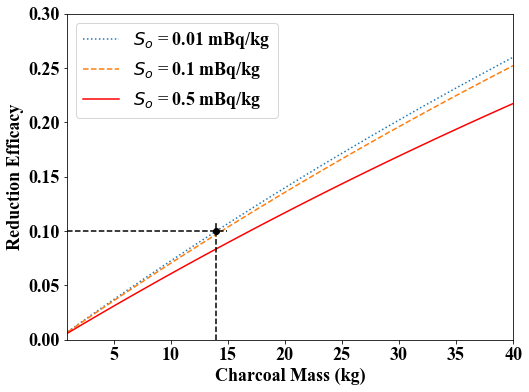

In [76]:
figure_layout(1)
plt.figure(figsize=(8,6))

plt.plot(massSpace, ectSpaceM001_loop,':',      label="$S_o$ = 0.01 mBq/kg")
plt.plot(massSpace, ectSpaceM010_loop,'--',     label="$S_o$ = 0.1 mBq/kg")
plt.plot(massSpace, ectSpaceM050_loop, c='red', label="$S_o$ = 0.5 mBq/kg")

plt.axhline(y=0.1, xmax = 0.36, color='k', linestyle='--')
plt.axvline(x=14, ymax = 0.36, color='k', linestyle='--')
plt.plot(14, 0.1, 'o', color='k')

#plt.gca().legend(loc='upper right', bbox_to_anchor=(1.5, 1.03))
plt.legend(loc='upper left')
plt.xlim(0.9, 40)
plt.ylim(0, 0.3)
plt.ylabel('Reduction Efficacy')
plt.xlabel('Charcoal Mass (kg)')
plt.show()




#### The power drawn by the room temp (295K) xenon flow of $f=500\,SLPM$ from 190K charcoal trap
heat given by $Q=M_{Xe}C_p\Delta T = \rho_{Xe}VC_p\Delta T$
power drawn by xenon flow $P = \frac{dQ}{dt} = \frac{dV}{dt} \rho_{Xe}C_p\Delta T = f\rho_{Xe}C_p\Delta T$

In [77]:
rho_xe = 5.86 #  g/l stp density of xenon
F_LZ = 500 # LZ flow rate  SLPM
F_iRRS = 0.5 # iRRS flow rate  SLPM
C_P = 0.158 #J/gK Specific heat of Xenon
dT = 295-190# K

def xePowerDrawnWatts(density, flowRate, specHeat, deltaT):
    return (1/60)*density*flowRate*specHeat*deltaT

P_LZ   = xePowerDrawnWatts(rho_xe, F_LZ, C_P, dT)
P_iRRS = xePowerDrawnWatts(rho_xe, F_iRRS, C_P, dT)

print("Power drawn by the xenon flow at %.1f SLPM is %.2f Watts " %(F_LZ, P_LZ))
print("Power drawn by the xenon flow at %.1f SLPM is %.2f Watts " %(F_iRRS, P_iRRS))

Power drawn by the xenon flow at 500.0 SLPM is 810.15 Watts 
Power drawn by the xenon flow at 0.5 SLPM is 0.81 Watts 


In [83]:
# Performance of the VSA as a function of specific activity of charcoal
# Parameters
nLoops = 1000 # number of swings
Evsa = 0.9 # VSA (feed column) remanent fraction, percentage of inlet radon trapped by VSA
Ect = 0.1 # radon removal efficacy of the cold trap, percentage of radon trapped by cold trap
F_leave = 0.9 # fraction of cleaned air (xenon) leaving the swing system
F_purge = (1-F_leave) # fraction of cleaned air (xenon) for purging the other colume of the swing system (F_leave + F_purge = 1)
Trn = 132*60 # Rn lifetime in unit of minute (note this is lifetime not half life)

T_feed = 60
TB = 1.5*T_feed # one swing time in unit of minute

purgeTB_frac = 0.1 # breakthrough time in purge column is about 10 times faster than feed column

SoSpace = np.linspace(0, 0.5, 2000)

flowRateLZ = 500 #SLPM 

# mass of the vsa not that for 0.9/0.1 feed purge ratio the flow rate through the VSA column is actually 1.1*flowRateLZ
flowRateColumnVSA = 1.1*flowRateLZ

Mvsa_cold = massCharForBreaktrhoughTime(TB, flowRateColumnVSA, 'cold') # mass of the vsa

Mvsa_warm = massCharForBreaktrhoughTime(TB, flowRateColumnVSA, 'warm') # mass of the vsa



#assuming 2microBq/kg inlet xenon activity
Nio_2_C = inletRnActivity(rho_xe, flowRateLZ, 2, T_feed)*Trn*60 # inital radon counts - number of radon atoms per feed time activity*tau(sec) asumption (steady state)
Ni_2_C = Nio_2_C # constant supply of Rn

#assuming 5microBq/kg inlet xenon activity
Nio_2_W = inletRnActivity(rho_xe, flowRateLZ, 2, T_feed)*Trn*60 # inital radon counts - number of radon atoms per feed time activity*tau(sec) asumption (steady state)
Ni_2_W = Nio_2_W # constant supply of Rn

# pre-allocation sim needed variables
Nout_2_C = np.zeros(nLoops) # array of radon count escaped in each swing
Nloop_2_C = np.zeros(nLoops) # array of radon count trapped during each swing
Nout_2_W = np.zeros(nLoops) # array of radon count escaped in each swing
Nloop_2_W = np.zeros(nLoops) # array of radon count trapped during each swing

Nout_st_2_C = np.zeros(len(SoSpace))
Nloop_st_2_C = np.zeros(len(SoSpace))
Nout_st_2_W = np.zeros(len(SoSpace))
Nloop_st_2_W = np.zeros(len(SoSpace))

# simulation starts:
for idx, s in enumerate(SoSpace):
    for i in range(0,nLoops):
        
        #number of radon atoms from the trap in one feed
        N_trap_C_feed = charcoalContributionCounts(s, Mvsa_cold, TB, T_feed)
        N_trap_C_purge = charcoalContributionCounts(s, Mvsa_cold, purgeTB_frac*TB, T_feed)
        N_trap_W_feed = charcoalContributionCounts(s, Mvsa_warm, TB, T_feed)
        N_trap_W_purge = charcoalContributionCounts(s, Mvsa_warm, purgeTB_frac*TB, T_feed)
        
        
        #number of radon escaped the swing system
        Nout_2_C[i] = F_leave*((1-Evsa)*Ni_2_C + N_trap_C_feed)
        Nout_2_W[i] = F_leave*((1-Evsa)*Ni_2_W + N_trap_W_feed)


        # Nin changes as we loop over the feed cycle time until we reach steady state
        Ni_2_C = (   (1-Ect)*(F_purge*(1-Evsa)*Ni_2_C + F_purge*N_trap_C_feed
                              + (Evsa*Ni_2_C)*np.exp(-T_feed/Trn) 
                              + N_trap_C_purge) 
                     + Nio_2_C                                                 )
        
        Ni_2_W = (   (1-Ect)*(F_purge*(1-Evsa)*Ni_2_W + F_purge*N_trap_W_feed
                              + (Evsa*Ni_2_W)*np.exp(-T_feed/Trn) 
                              + N_trap_W_purge)
                     + Nio_2_W                                                 )
        
    Nout_st_2_C[idx] = Nout_2_C[-1]
    Nout_st_2_W[idx] = Nout_2_W[-1]

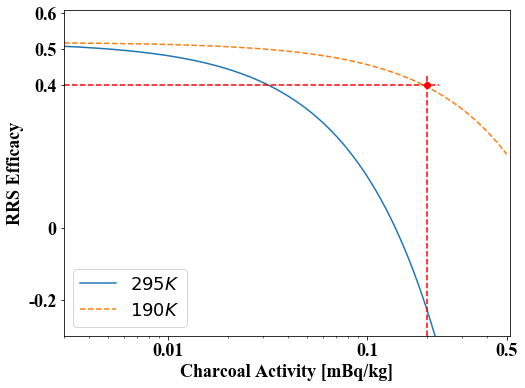

In [84]:
figure_layout(1)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(SoSpace, 1-Nout_st_2_W/Nio_2_W         ,label='$295 K$')
ax.plot(SoSpace, 1-Nout_st_2_C/Nio_2_C,  '--'  ,label='$190 K$')

#ax.axhline(y=0.145, color='r', xmax=0.9, linestyle='--')
ax.axhline(y=0.4, color='r', xmax=0.84, linestyle='--')
ax.axvline(x=0.2, color='r', ymax=0.8,  linestyle='--')
#ax.plot(0.1, 0.145, 'ro')
ax.plot(0.2, 0.4, 'ro')

#ax.set_yscale('log')
ax.set_yticks([-0.2, 0, 0.4, 0.5, 0.6])
#ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_yticklabels(['-0.2', '0', '0.4', '0.5','0.6'])
ax.set_xscale('log')
ax.set_xticks([0.001, 0.01, 0.1, 0.5])
ax.set_xticklabels(['', '0.01', '0.1', '0.5'])
#ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xlabel('Charcoal Activity [mBq/kg]')
ax.set_ylabel('RRS Efficacy')
#plt.grid(True)
plt.xlim(0.003, 0.52)
plt.ylim(-0.3, 0.61)
ax.legend()